In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('btc_processed_data.xlsx')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...,...
1914,2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717
1915,2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
1916,2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
1917,2024-05-30,67576.085938,69500.539062,67118.078125,68364.992188,68364.992188,29509712534


In [2]:
# 3. Chia train test validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))
test_size = len(df) - train_size
train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 4. Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [4]:
# 5. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


In [5]:
# 6. Training process
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 7. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [9]:
# 8. Evaluate model accuracy with RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing MAPE: {test_mape}%")

Testing RMSE: 13613.069208083916
Testing MAE: 11676.300977123487
Testing MAPE: 30.093314372614895%


In [10]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# Create a new dataframe with the predicted closing prices
df_next_30_days = pd.DataFrame(y_next_30_days, index=last_30_data, columns=['Close'])

# Print the dataframe
print(df_next_30_days)

#Quá trình tạo index predict 60 ngày tiếp theo
last_index = last_30_data[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Create a new dataframe with the predicted closing prices
df_next_60_days = pd.DataFrame(y_next_60_days, index=last_60_data, columns=['Close'])

# Print the dataframe
print(df_next_60_days)

#Quá trình tạo index predict 90 ngày tiếp theo
last_index = last_60_data[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# Create a new dataframe with the predicted closing prices
df_next_90_days = pd.DataFrame(y_next_90_days, index=last_90_data, columns=['Close'])

# Print the dataframe
print(df_next_90_days)




Predicted closing prices for the next 30 days:
[46321.42376631 46340.45754533 46359.49132434 46378.52510335
 46397.55888236 46416.59266137 46435.62644039 46454.6602194
 46473.69399841 46492.72777742 46511.76155644 46530.79533545
 46549.82911446 46568.86289347 46587.89667248 46606.9304515
 46625.96423051 46644.99800952 46664.03178853 46683.06556755
 46702.09934656 46721.13312557 46740.16690458 46759.20068359
 46778.23446261 46797.26824162 46816.30202063 46835.33579964
 46854.36957866 46873.40335767]
             Close
1918  46321.423766
1919  46340.457545
1920  46359.491324
1921  46378.525103
1922  46397.558882
1923  46416.592661
1924  46435.626440
1925  46454.660219
1926  46473.693998
1927  46492.727777
1928  46511.761556
1929  46530.795335
1930  46549.829114
1931  46568.862893
1932  46587.896672
1933  46606.930451
1934  46625.964231
1935  46644.998010
1936  46664.031789
1937  46683.065568
1938  46702.099347
1939  46721.133126
1940  46740.166905
1941  46759.200684
1942  46778.234463
19

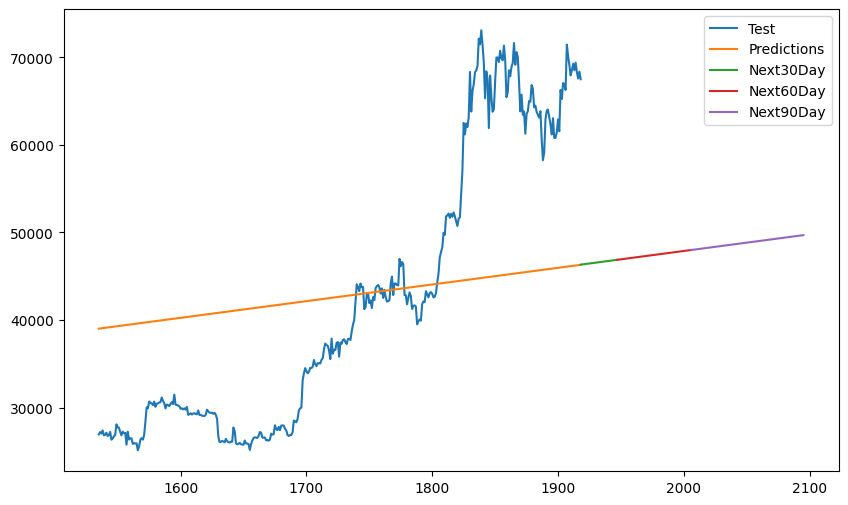

In [11]:
#Vẽ hình
plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()